# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# Displaying the dimention of the dataframe
display("Shape of customer_booking", df.shape)
print(f"The customer Booking data set has {df.shape[0]} rows and {df.shape[1]} columns")

'Shape of customer_booking'

(50000, 14)

The customer Booking data set has 50000 rows and 14 columns


In [9]:
# Checking if i have some null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

* This shows that here is no null values 

=> Now i am going to check if there is some data redundance, then delete them if exist to make sure that no duplicates in my Customer Booking dataset

In [13]:
df_dup = df[df.duplicated(keep = 'last')]
df_dup

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
115,1,Internet,RoundTrip,65,278,2,4,AKLKUL,Malaysia,0,0,0,8.83,0
117,1,Internet,RoundTrip,263,58,4,7,AKLKUL,Malaysia,0,1,0,8.83,0
122,1,Internet,RoundTrip,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1
135,4,Internet,RoundTrip,366,17,16,7,AKLKUL,Malaysia,1,0,1,8.83,0
177,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49829,2,Internet,RoundTrip,204,6,14,2,PENTPE,Malaysia,1,0,0,4.67,0
49836,1,Mobile,RoundTrip,106,6,11,5,PENTPE,Taiwan,1,0,0,4.67,0
49905,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0
49911,1,Internet,RoundTrip,30,6,7,4,PENTPE,Taiwan,0,0,0,4.67,0


In [14]:
df_dup1 = df[df.duplicated(keep = 'first')]
df_dup1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,5,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,2,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,2,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,5,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0


In [15]:
# Shape of duplicated values

df_dup.shape

(719, 14)

* This shows that i have 719 rows duplicates data, so i have to remove them.

In [16]:
# removing duplicated values

df = df.drop_duplicates()

In [17]:
# Seeing the dimentions of data frames after dropping null and duplicated values

display('Shape of df ', df.shape)
print(f"The customer data set nas {df.shape[0]} rows and {df.shape[1]} columns")

'Shape of df '

(49281, 14)

The customer data set nas 49281 rows and 14 columns


* Now the customer Booking dataset does not contain any null and duplicated values

In [18]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
# Checking for datatypes

df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [11]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [19]:
from scipy import stats
def Tabulation(x):
    table = pd.DataFrame(x.dtypes, columns=['dtype'])
    table1 = pd.DataFrame(x.columns, columns=['Names'])
    table = table.reset_index()
    table = table.rename(columns = {'index':'Name'})
    table['No of Missing'] = x.isna().sum().values
    table['no of Uniques'] = x.nunique().values
    table['Percent of Missing'] = ((x.isna().sum().values)/(x.shape[0]))*100
    table['First Observation'] = x.loc[0].values
    table['Second Observation'] = x.loc[1].values
    table['Third Observation'] = x.loc[2].values
    for name in table['Name'].value_counts().index:
        table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True),base=2),2)
    return table

In [20]:
Tabulation(df)

,Name,dtype,No of Missing,no of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,num_passengers,int64,0,9,0.0,2,1,2,1.50
1,sales_channel,object,0,2,0.0,Internet,Internet,Internet,0.50
2,trip_type,object,0,3,0.0,RoundTrip,RoundTrip,RoundTrip,0.09
3,purchase_lead,int64,0,470,0.0,262,112,243,7.81
4,length_of_stay,int64,0,335,0.0,19,20,22,4.99
5,flight_hour,int64,0,24,0.0,7,3,17,4.34
6,flight_day,int64,0,7,0.0,6,6,3,2.80
7,route,object,0,799,0.0,AKLDEL,AKLDEL,AKLDEL,8.07
8,booking_origin,object,0,104,0.0,New Zealand,New Zealand,India,3.31
9,wants_extra_baggage,int64,0,2,0.0,1,0,1,0.92


In [21]:
def show_unique(x):
    class color:
        BOLD = '\033[1m'
        END = '\033[0m'
    for col in x.columns:
        print('Total Unique ' + color.BOLD +col+ color.END + " Values in Train data {}".format(x[col].nunique()))

In [22]:
show_unique(df)

Total Unique num_passengers Values in Train data 9
Total Unique sales_channel Values in Train data 2
Total Unique trip_type Values in Train data 3
Total Unique purchase_lead Values in Train data 470
Total Unique length_of_stay Values in Train data 335
Total Unique flight_hour Values in Train data 24
Total Unique flight_day Values in Train data 7
Total Unique route Values in Train data 799
Total Unique booking_origin Values in Train data 104
Total Unique wants_extra_baggage Values in Train data 2
Total Unique wants_preferred_seat Values in Train data 2
Total Unique wants_in_flight_meals Values in Train data 2
Total Unique flight_duration Values in Train data 21
Total Unique booking_complete Values in Train data 2


In [23]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

* now i am going to seperate dependent(x) and target from train dataset

In [24]:
x = df.drop(columns=['booking_complete'])
y = df[['booking_complete']]

In [25]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52


In [26]:
y.head()

,booking_complete
0,0
1,0
2,0
3,0
4,0


### Seperate cat and con features for x

In [27]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [28]:
cat

['sales_channel', 'trip_type', 'route', 'booking_origin']

In [29]:
con

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

In [30]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score

* Now i am going to create a feature selection pipeline to enhance the overall model performance 

In [31]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [32]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['num_passengers', 'purchase_lead',
                                  'length_of_stay', 'flight_hour', 'flight_day',
                                  'wants_extra_baggage', 'wants_preferred_seat',
                                  'wants_in_flight_meals', 'flight_duration']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['sales_channel', 'trip_type', 'route',
                                  'booking_origin'])])

In [34]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__flight_day,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel,cat__trip_type,cat__route,cat__booking_origin
0,0.403150,1.960824,-0.119827,-0.382535,1.097640,0.704622,-0.647851,-0.862606,-1.176158,0.0,2.0,0.0,61.0
1,-0.580591,0.301703,-0.090269,-1.121490,1.097640,-1.419200,-0.647851,-0.862606,-1.176158,0.0,2.0,0.0,61.0
2,0.403150,1.750668,-0.031153,1.464855,-0.408466,0.704622,1.543565,-0.862606,-1.176158,0.0,2.0,0.0,36.0
3,-0.580591,0.124730,0.234868,-0.936751,1.097640,-1.419200,-0.647851,1.159277,-1.176158,0.0,2.0,0.0,61.0
4,0.403150,-0.184973,-0.031153,1.095377,-0.408466,0.704622,-0.647851,1.159277,-1.176158,0.0,2.0,0.0,36.0


## Perform feature selection with mutual information scores

In [35]:
mi = mutual_info_classif(x_pre, y)
mi

c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00343474, 0.00286831, 0.00988146, 0.00019201, 0.00193325,
       0.00860931, 0.00333536, 0.00627817, 0.01963465, 0.0010923 ,
       0.00586712, 0.05298645, 0.04629692])

In [36]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat__route                    0.052986
cat__booking_origin           0.046297
num__flight_duration          0.019635
num__length_of_stay           0.009881
num__wants_extra_baggage      0.008609
num__wants_in_flight_meals    0.006278
cat__trip_type                0.005867
num__num_passengers           0.003435
num__wants_preferred_seat     0.003335
num__purchase_lead            0.002868
num__flight_day               0.001933
cat__sales_channel            0.001092
num__flight_hour              0.000192
dtype: float64

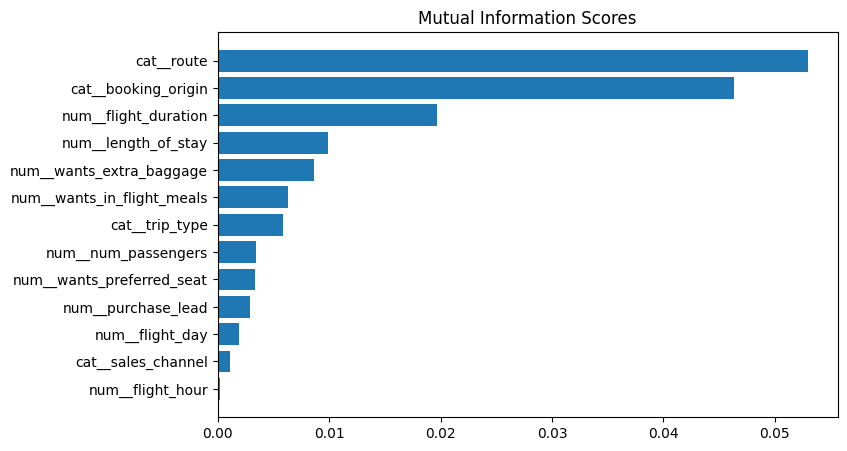

In [38]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi)

*`We can see

1.   route 
2.   booking_origin
3.   flight_duration          
4.   wants_extra_baggage      
5.   length_of_stay          

* are the top 5 features which are dependant with booking_complete feature

* Create a Final selection pipeline using OneHotEncoder to enhance the overall model performance 

In [40]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [41]:
x_pre1 = pre1.fit_transform(x)
x_pre1.head()

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__flight_day,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel_Internet,...,cat__booking_origin_Timor-Leste,cat__booking_origin_Tonga,cat__booking_origin_Tunisia,cat__booking_origin_Turkey,cat__booking_origin_Ukraine,cat__booking_origin_United Arab Emirates,cat__booking_origin_United Kingdom,cat__booking_origin_United States,cat__booking_origin_Vanuatu,cat__booking_origin_Vietnam
0,0.403150,1.960824,-0.119827,-0.382535,1.097640,0.704622,-0.647851,-0.862606,-1.176158,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.580591,0.301703,-0.090269,-1.121490,1.097640,-1.419200,-0.647851,-0.862606,-1.176158,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.403150,1.750668,-0.031153,1.464855,-0.408466,0.704622,1.543565,-0.862606,-1.176158,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.580591,0.124730,0.234868,-0.936751,1.097640,-1.419200,-0.647851,1.159277,-1.176158,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.403150,-0.184973,-0.031153,1.095377,-0.408466,0.704622,-0.647851,1.159277,-1.176158,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### perform train test split for x

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre1, y, test_size=0.2, random_state=21)

In [67]:
display(xtrain.head())
print(f"Shape of xtrain data {xtrain.shape}")

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__flight_day,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel,cat__trip_type,cat__route,cat__booking_origin
3244,-0.580591,-0.173912,0.234868,-0.013057,-1.412536,0.704622,-0.647851,-0.862606,0.868784,0.0,2.0,85.0,17.0
46848,2.370633,1.817033,-0.504081,1.280116,1.599675,0.704622,1.543565,1.159277,0.193819,0.0,2.0,397.0,51.0
29727,-0.580591,0.821560,-0.563197,-0.382535,-0.408466,0.704622,-0.647851,1.159277,-1.176158,1.0,2.0,79.0,36.0
25804,-0.580591,-0.572101,-0.622313,1.280116,0.595604,-1.419200,-0.647851,-0.862606,0.928929,0.0,2.0,187.0,43.0
27124,-0.580591,0.843682,-0.592755,0.725899,1.599675,-1.419200,-0.647851,-0.862606,-0.187101,0.0,2.0,287.0,93.0


Shape of xtrain data (39424, 13)


In [68]:
display(xtest.head())
print(f"Shape of xtest data {xtest.shape}")

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__flight_day,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel,cat__trip_type,cat__route,cat__booking_origin
19627,0.403150,-0.384068,-0.060711,-1.306229,0.595604,0.704622,1.543565,1.159277,1.035854,1.0,2.0,632.0,37.0
21679,-0.580591,-0.173912,0.530448,0.541160,1.599675,0.704622,1.543565,-0.862606,1.035854,0.0,2.0,682.0,4.0
37227,-0.580591,-0.295581,-0.533639,-0.382535,-0.408466,-1.419200,-0.647851,-0.862606,-1.109330,0.0,2.0,293.0,4.0
35807,-0.580591,-0.926047,-0.533639,-0.197796,0.595604,-1.419200,-0.647851,-0.862606,-0.187101,1.0,2.0,105.0,37.0
26008,-0.580591,-0.583162,-0.622313,0.541160,-1.412536,-1.419200,1.543565,-0.862606,0.193819,0.0,2.0,404.0,43.0


Shape of xtest data (9857, 13)


# Algo Evaluation with all features

In [69]:
dct = {
       'Random Forest' : RandomForestClassifier(),
       'Gradient Boost' : GradientBoostingClassifier()
}

In [70]:
dct.items()

dict_items([('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [71]:
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 Score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # Calculate 5 fold cross validated result
    scores = cross_val_score(model, xtrain, ytrain, cv =5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Print the results for each model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr : .4f}')
    print(f'Testing F1 : {f1_ts : .4f}')
    print(f'F1 Cross Validated : {f1_cv : .4f}')
    print('\n==================================================\n')

c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConvers

Model Name : Random Forest

Training F1 :  0.9992
Testing F1 :  0.1480
F1 Cross Validated :  0.5329




c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A 

Model Name : Gradient Boost

Training F1 :  0.0569
Testing F1 :  0.0457
F1 Cross Validated :  0.4900




### Finalizing random forest model with all features as final model, as it has good accuracy score compared to other models

In [72]:
best_model = RandomForestClassifier()
best_model.fit(xtrain, ytrain)

c:\Users\user5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [73]:
best_model.score(xtrain, ytrain)

0.9998731737012987

In [74]:
best_model.score(xtest, ytest)

0.8471137262858882

In [75]:
# Make prediction on the train set
ypred_tr = best_model.predict(xtrain)

# Make prediction on the test set
ypred_ts = best_model.predict(xtest)

In [76]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [77]:
ytest.head()

,booking_complete
19627,0
21679,0
37227,0
35807,0
26008,0


### Plot a Confusion Matrix

In [78]:
best_model.classes_

array([0, 1], dtype=int64)

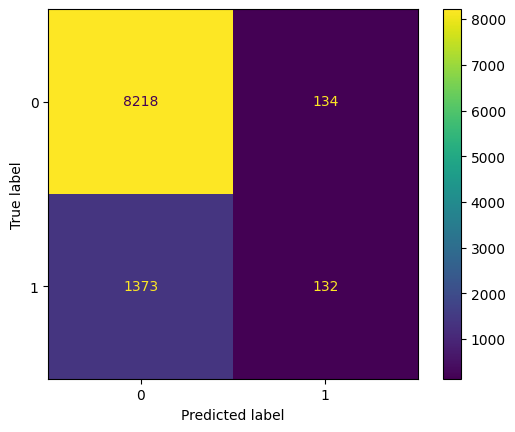

In [79]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_model.classes_)
cfd.plot()

### Print calssification report

In [80]:
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8352
           1       0.50      0.09      0.15      1505

    accuracy                           0.85      9857
   macro avg       0.68      0.54      0.53      9857
weighted avg       0.80      0.85      0.80      9857



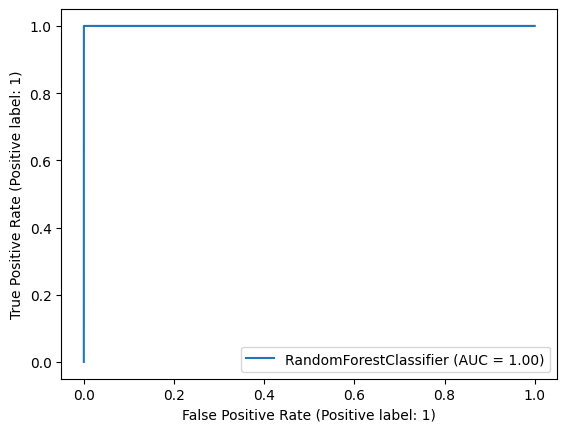

In [81]:
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

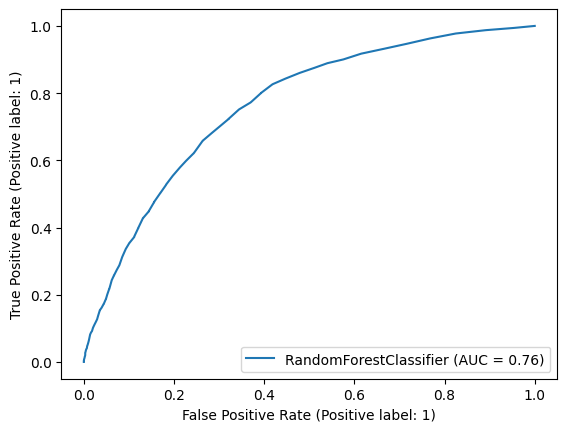

In [82]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)